<a href="https://colab.research.google.com/github/KarthiK-ctrl-A/Colab-PyTorch-NeuralNetwork/blob/main/Task1_BuildingNeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the iris dataset

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)

# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes

print(df.head())
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [ ]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = nn.Sequential(
      nn.Linear(X_train.shape[1], 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 8),
      nn.ReLU(),
      nn.Linear(8, 3) # Output layer for 3 classes
    )
  def forward(self, x):
    return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss:{running_loss/len(train_loader):.4f}")


Epoch 1/20, Loss:0.1368
Epoch 1/20, Loss:0.2820
Epoch 1/20, Loss:0.4162
Epoch 1/20, Loss:0.5586
Epoch 1/20, Loss:0.6973
Epoch 1/20, Loss:0.8311
Epoch 1/20, Loss:0.9665
Epoch 1/20, Loss:1.0903
Epoch 2/20, Loss:0.1365
Epoch 2/20, Loss:0.2668
Epoch 2/20, Loss:0.4122
Epoch 2/20, Loss:0.5432
Epoch 2/20, Loss:0.6715
Epoch 2/20, Loss:0.8076
Epoch 2/20, Loss:0.9413
Epoch 2/20, Loss:1.0714
Epoch 3/20, Loss:0.1281
Epoch 3/20, Loss:0.2676
Epoch 3/20, Loss:0.3943
Epoch 3/20, Loss:0.5246
Epoch 3/20, Loss:0.6566
Epoch 3/20, Loss:0.7912
Epoch 3/20, Loss:0.9198
Epoch 3/20, Loss:1.0468
Epoch 4/20, Loss:0.1289
Epoch 4/20, Loss:0.2533
Epoch 4/20, Loss:0.3788
Epoch 4/20, Loss:0.5048
Epoch 4/20, Loss:0.6305
Epoch 4/20, Loss:0.7591
Epoch 4/20, Loss:0.8854
Epoch 4/20, Loss:1.0114
Epoch 5/20, Loss:0.1239
Epoch 5/20, Loss:0.2478
Epoch 5/20, Loss:0.3675
Epoch 5/20, Loss:0.4877
Epoch 5/20, Loss:0.6056
Epoch 5/20, Loss:0.7216
Epoch 5/20, Loss:0.8386
Epoch 5/20, Loss:0.9574
Epoch 6/20, Loss:0.1149
Epoch 6/20, Loss

# Step 3: Validate the Model

In [ ]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)
    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 1.0000
Test Accuracy: 1.0000


# Step 4: Visualize Training and Data

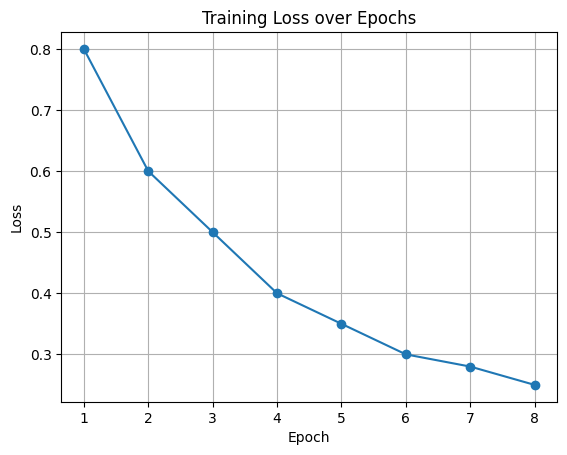

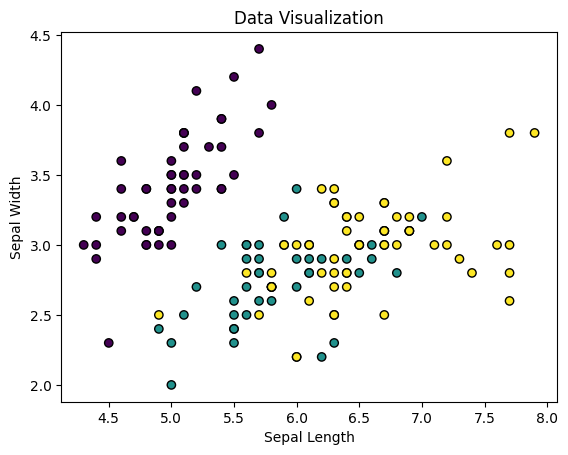

In [ ]:
# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()
# Visualize data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Visualization')
plt.show()

#Wine Dataset

In [ ]:


columns = ['Class','Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash','Magnesium',	'Total_phenols', 'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']

Epoch 1/20, Loss: 0.9671
Epoch 2/20, Loss: 0.8430
Epoch 3/20, Loss: 0.7099
Epoch 4/20, Loss: 0.6018
Epoch 5/20, Loss: 0.5370
Epoch 6/20, Loss: 0.4488
Epoch 7/20, Loss: 0.3748
Epoch 8/20, Loss: 0.2991
Epoch 9/20, Loss: 0.2489
Epoch 10/20, Loss: 0.2441
Epoch 11/20, Loss: 0.2479
Epoch 12/20, Loss: 0.1663
Epoch 13/20, Loss: 0.2304
Epoch 14/20, Loss: 0.1366
Epoch 15/20, Loss: 0.1367
Epoch 16/20, Loss: 0.2218
Epoch 17/20, Loss: 0.1100
Epoch 18/20, Loss: 0.1443
Epoch 19/20, Loss: 0.0970
Epoch 20/20, Loss: 0.0796
Test Accuracy: 1.0000


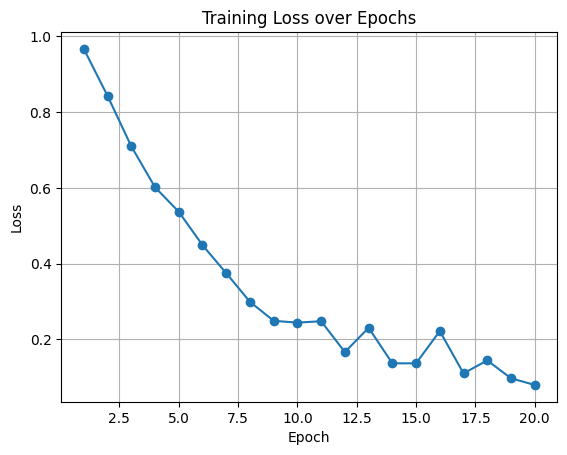

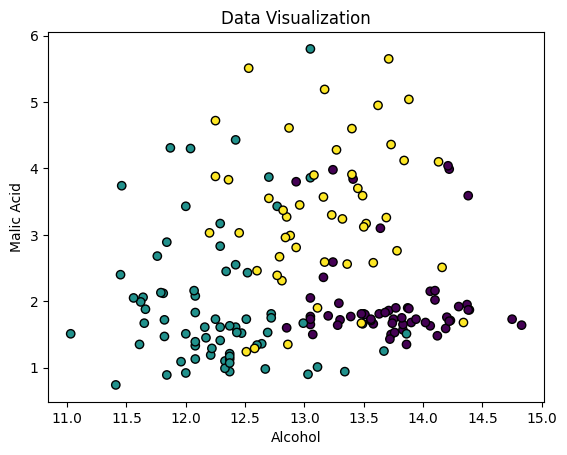

In [ ]:
# Step 1: Load and preprocess the data
columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
           'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
           'Proanthocyanins', 'Color_intensity', 'Hue',
           'OD280/OD315_of_diluted_wines', 'Proline']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, names=columns)

# Split data into features (X) and labels (y)
X = df.iloc[:, 1:].values
y = df['Class'].values - 1  # Ensure classes are zero-indexed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Step 2: Define the Neural Network with Dropout and BatchNorm
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the Model with loss tracking
epochs = 20
losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Step 4: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

# Step 5: Visualize Training Loss
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution (2D scatter using two features)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Data Visualization')
plt.show()